## Example of ground motion processing using opseestools

### Loading libraries

In [1]:
import opseestools.utilidades as ut
import numpy as np
import matplotlib.pyplot as plt

### Loading and inspecting the ground motion

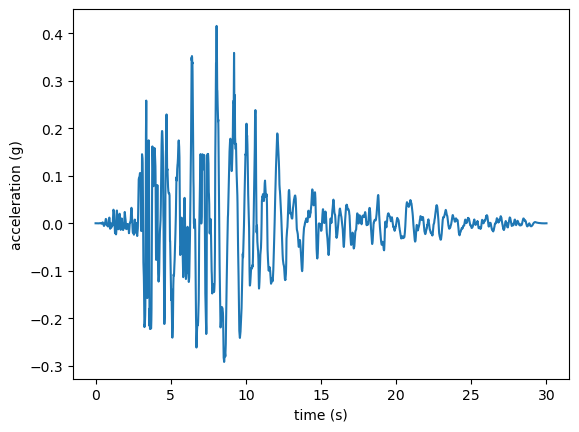

In [2]:
acel = np.loadtxt('GM01.txt')
dt = 0.01
t = np.linspace(0,len(acel)*dt,len(acel))
plt.xlabel('time (s)')
plt.ylabel('acceleration (g)')
plt.plot(t,acel)
plt.show()

### Calculating the Fourier amplitude spectrum

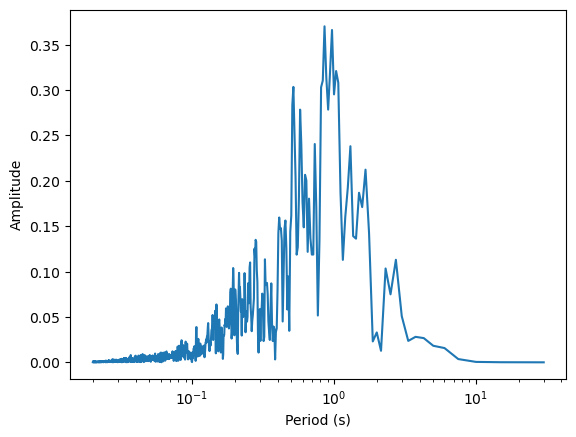

In [3]:
T,A = ut.EAF(t,acel)
plt.semilogx(T,A)
plt.xlabel('Period (s)')
plt.ylabel('Amplitude')
plt.show()

### Calculate the response spectrum

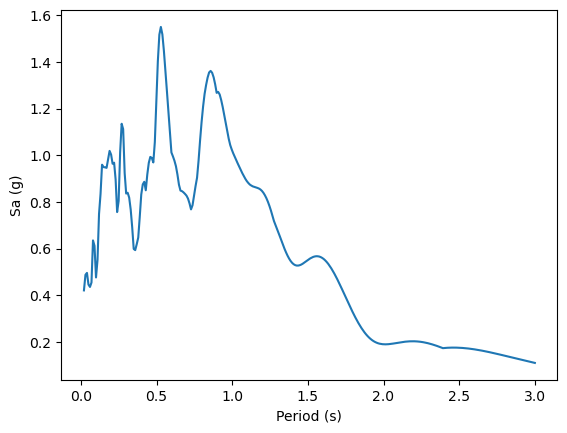

In [4]:
T,Sa,U,A = ut.spectrum4('GM01.txt',dt)
plt.plot(T,Sa)
plt.xlabel('Period (s)')
plt.ylabel('Sa (g)')
plt.show()

### Calculate the Sa_avg spectrum

#### This requires computing Sa for at least up to 2.5 times the desired period, which by default is 3.0s

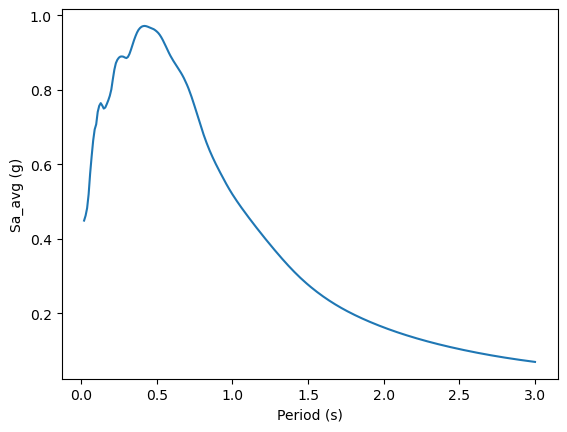

In [5]:
xi = 0.05
T,Sa,U,A = ut.spectrum4('GM01.txt',dt,xi,[0.02,9],900)
T2,Sa_avg = ut.Sa_avg(T,Sa)
plt.plot(T2,Sa_avg)
plt.xlabel('Period (s)')
plt.ylabel('Sa_avg (g)')
plt.show()

### Calculate the Arias Intensity

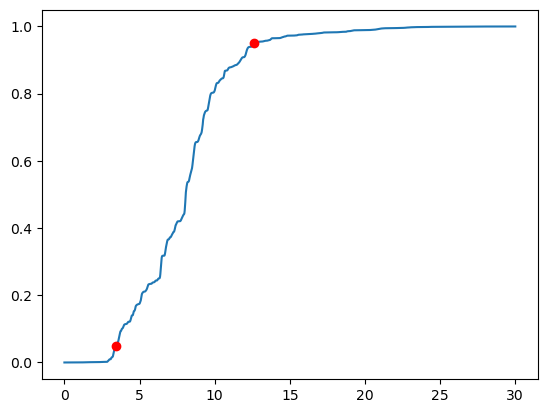

In [6]:
a2,t1 = ut.cumAI(t,acel)